# Phase 3 Project Submission

Please fill out:
* Student name: Lucas Wilkerson
* Student pace: Flex/part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

# Diabetes Risk Assessment and Prediction

## Project Overview

## Business Problem and Stakeholder

## Data Understanding

In [1]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing packages for statistics and modeling
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kstest





## Data Preparation/ Preprocessing

In [2]:
# Loading Dataset
diabetes = pd.read_csv('diabetes_2.csv')

#Previewing first 5 rows 
diabetes.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [3]:
# Previewing general information on dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

Features of Dataset:
- Age
- Gender
- BMI
- SBP (Systolic Blood Pressure)
- DBP (Diastolic Blood Pressure)
- FPG (Fasting Plasma Glucose)
- FFPG (Final Fasting Plasma Glucose)
- Cholesterol
- Triglyceride
- HDL (High-Density Lipoprotein)
- LDL (Low-Density Lipoprotein)
- ALT (Alanine Aminotransferase)
- BUN (Blood urea nitrogen)
- CCR (Creatinine Clearance)
- Smoking Status
- Drinking Status
- Family History
- Diabetes: presence of Diabetes 

In [4]:
# Checking for missing values
diabetes.isna().sum()


Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

In [5]:
# Getting number of patients with and without diabetes
diabetes['Diabetes'].value_counts()

0    3000
1    1303
Name: Diabetes, dtype: int64

In [6]:
# Getting descriptive statistics on dataset 
diabetes.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


In [7]:
#Getting value_counts for whole dataset
for col in diabetes:
        print (diabetes[col].value_counts())

34    169
33    137
35    137
37    128
29    121
     ... 
91      2
90      2
23      2
22      2
93      1
Name: Age, Length: 70, dtype: int64
1    2790
2    1513
Name: Gender, dtype: int64
23.50    62
23.40    59
26.00    59
24.80    56
26.10    55
         ..
27.48     1
19.47     1
20.76     1
26.06     1
32.50     1
Name: BMI, Length: 275, dtype: int64
122    107
111    106
123    104
129    103
110    103
      ... 
191      1
186      1
190      1
198      1
72       1
Name: SBP, Length: 111, dtype: int64
72     191
77     190
73     156
76     153
74     147
      ... 
126      1
134      1
47       1
111      1
48       1
Name: DBP, Length: 75, dtype: int64
5.10    97
5.00    93
4.90    77
5.20    71
5.30    71
        ..
2.95     1
3.57     1
3.64     1
3.27     1
3.70     1
Name: FPG, Length: 361, dtype: int64
4.00    70
4.50    49
5.00    47
4.60    41
4.20    40
        ..
6.51     1
8.25     1
7.25     1
2.61     1
2.93     1
Name: Chol, Length: 486, dtype: int64
1.00  

In [9]:
diabetes['HDL'].value_counts()

4.860753    411
1.000000     68
1.300000     62
1.200000     61
1.240000     58
           ... 
2.200000      1
2.380000      1
2.070000      1
0.480000      1
2.770000      1
Name: HDL, Length: 188, dtype: int64

In [8]:
diabetes['Tri'].value_counts()

1.00    85
0.70    63
0.60    59
1.10    56
0.90    52
        ..
8.50     1
4.75     1
4.96     1
3.24     1
5.06     1
Name: Tri, Length: 478, dtype: int64

In [9]:
diabetes['FFPG'].value_counts()

5.20    149
4.90    135
5.30    132
4.80    130
5.10    128
       ... 
6.79      1
7.54      1
9.80      1
3.96      1
8.11      1
Name: FFPG, Length: 479, dtype: int64

When looking over the values, units for glucose measurements(FPG, FFPG)and lipid measurements (Chol, Tri, HDL, LDL) are presented in metric units (mmol). While initially there seems to be no null/missing values, upon review of  value counts there is an abnormal value, 4.860753, that seems to be common in most columns. This may be a placeholder for missing values. This will need to be addressed. 

The current dataset contains 4303 entries with 18 columns which contain numerical data types. Looking further into our dataset, the column Diabetes is a binary classification variable. This is the target variable in which a value of 0 represents absense of diabetes and a value of 1 represents presence of diabetes. 

Regarding the Diabetes column there are 3000 entries showing no diabetes diagnosis while 1303 indicate a diabetes diagnosis. 

In [10]:
# Create a new DataFrame to store the filtered data
filtered_diabetes = diabetes.copy()

# Value to drop
value_to_drop = 4.860753

# Loop through the columns and drop rows containing the value
for col in diabetes.columns:
    filtered_diabetes = filtered_diabetes[filtered_diabetes[col] != value_to_drop]

# Reset the index of the filtered DataFrame
filtered_diabetes.reset_index(drop=True, inplace=True)

# Print the filtered DataFrame
print(filtered_diabetes)

      Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0      26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1      40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2      40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3      43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4      36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   
...   ...     ...   ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
3255   77       1  22.9  134   73  5.52  4.02  1.28  1.23  2.25  42.2  4.34   
3256   54       1  23.4  126   75  6.82  5.00  1.50  1.24  2.98   8.0  3.50   
3257   67       1  24.6  138   81  4.85  3.89  1.38  1.14  2.17  18.1  4.73   
3258   60       2  29.0  101   60  6.70  5.91  1.29  1.73  2.85  18.9  7.33   
3259   37       1  34.3  120   71  4.97  5.42  2.66  1.08  2.87  81.0  4.61   

       CCR  FFPG  smoking  drinking  family_histroy

In [11]:
diabetes_df = filtered_diabetes.copy()
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3260 non-null   int64  
 1   Gender          3260 non-null   int64  
 2   BMI             3260 non-null   float64
 3   SBP             3260 non-null   int64  
 4   DBP             3260 non-null   int64  
 5   FPG             3260 non-null   float64
 6   Chol            3260 non-null   float64
 7   Tri             3260 non-null   float64
 8   HDL             3260 non-null   float64
 9   LDL             3260 non-null   float64
 10  ALT             3260 non-null   float64
 11  BUN             3260 non-null   float64
 12  CCR             3260 non-null   float64
 13  FFPG            3260 non-null   float64
 14  smoking         3260 non-null   float64
 15  drinking        3260 non-null   float64
 16  family_histroy  3260 non-null   int64  
 17  Diabetes        3260 non-null   i

After cleaning and preparation the cleaned dataset now contains 3260 rows with 18 columns containing numerical data types. 

## Data Analysis

In [12]:
diabetes_df.corr()["Diabetes"].sort_values(ascending = False)

Diabetes          1.000000
FFPG              0.525417
FPG               0.362254
Age               0.337337
SBP               0.190874
BMI               0.157559
Tri               0.115426
DBP               0.113250
BUN               0.103984
Chol              0.098017
family_histroy    0.074080
LDL               0.072715
ALT               0.068399
drinking          0.029131
CCR               0.016781
Gender           -0.067812
HDL              -0.083152
smoking          -0.101890
Name: Diabetes, dtype: float64

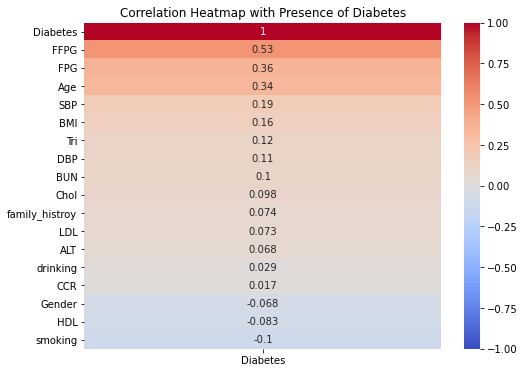

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df.corr()[['Diabetes']].sort_values(by='Diabetes', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of Diabetes')
plt.show()

Looking at the correlations of the current variables we see that the top 3 highest correlates are:

- FFPG (Final Fasting Plasma Glucose): highest correlation at 0.53
- FPG (Fasting Plasma Glucose): 2nd highest correlation at 0.36
- Age: 3rd highest correlation at 0.34

## Data Visualization

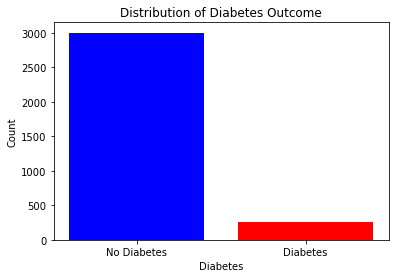

In [14]:
#Plotting visual for target variable

outcome_counts = diabetes_df['Diabetes'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xticks(outcome_counts.index, ['No Diabetes', 'Diabetes'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')
plt.show()

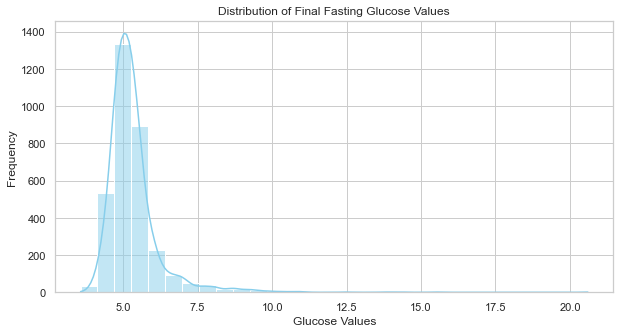

In [15]:
#Plotting a histogram to check the distribution of Glucose Values
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['FFPG'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Final Fasting Glucose Values')
plt.xlabel('Glucose Values')
plt.ylabel('Frequency')

plt.show()


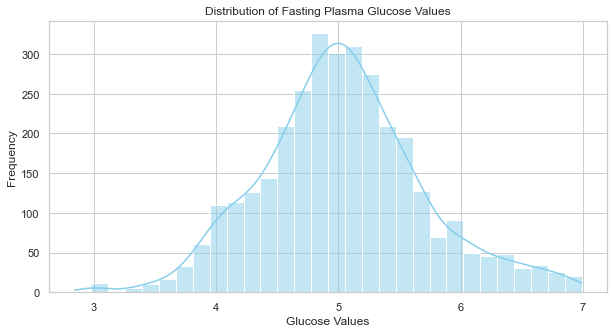

In [17]:
#Plotting a histogram to check the distribution of Glucose Values
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['FPG'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Fasting Plasma Glucose Values')
plt.xlabel('Glucose Values')
plt.ylabel('Frequency')

plt.show()


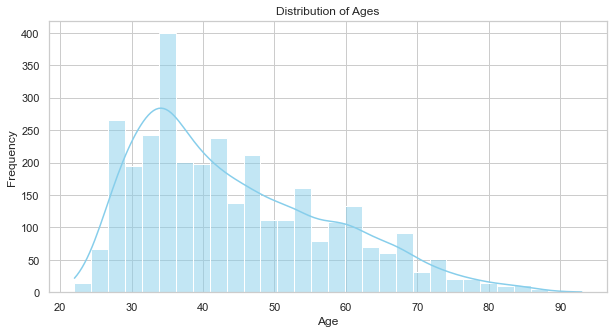

In [18]:
#Plotting a histogram to check the distribution of Ages
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['Age'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


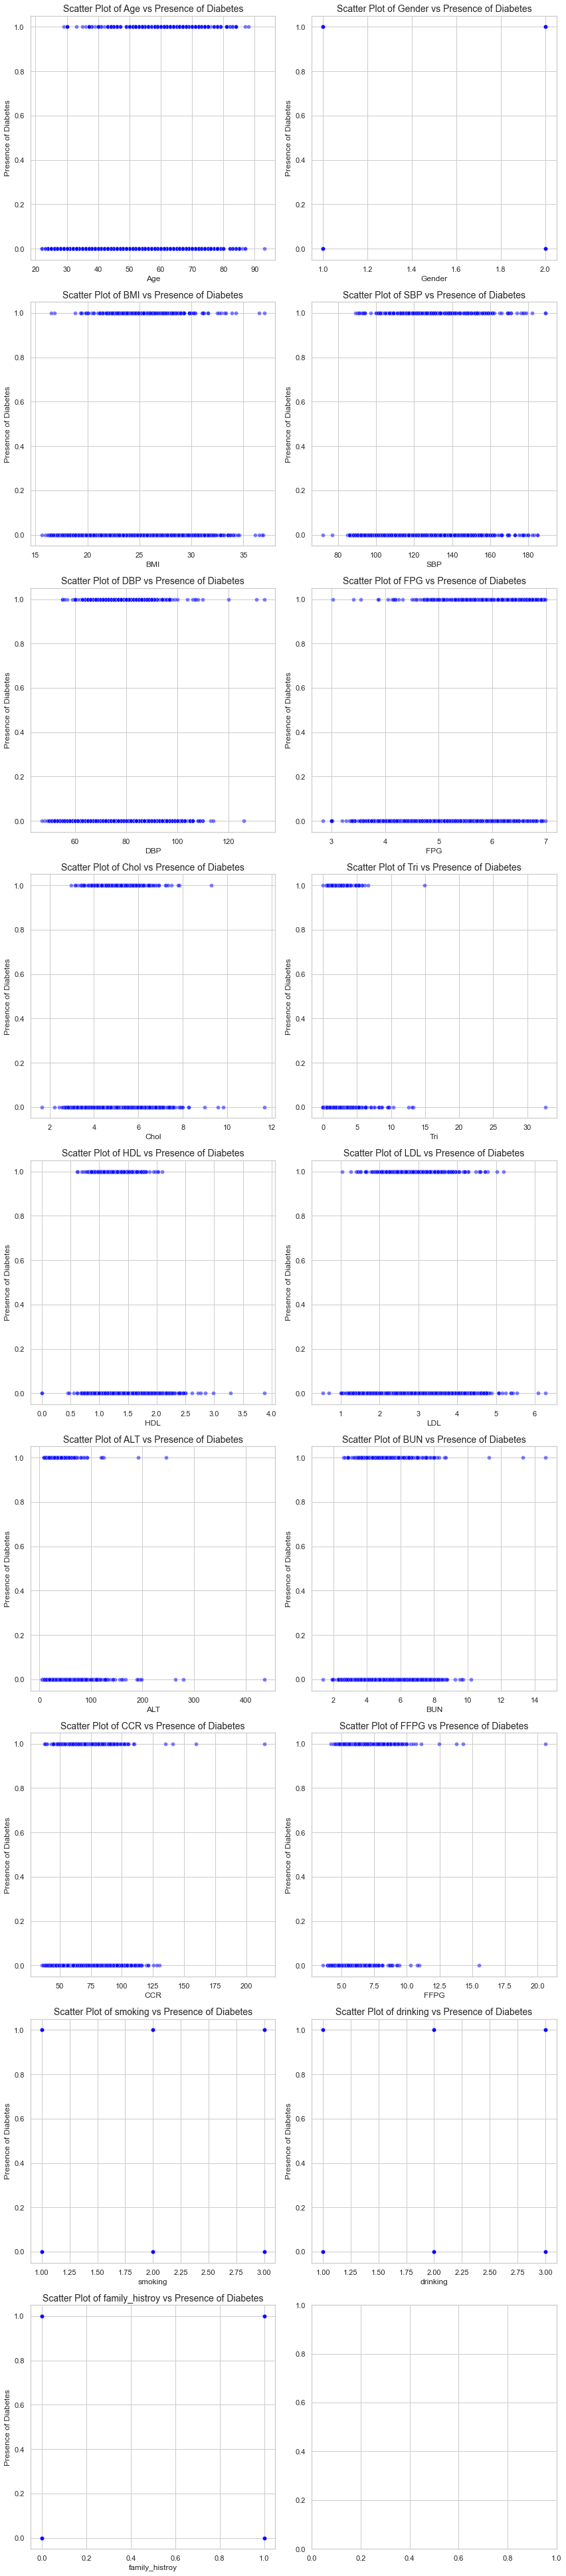

In [19]:
# Plotting scatter plots for these same feature variables. 
dm_predictors = diabetes_df.drop(columns = ['Diabetes'], axis =1).copy()

num_rows = (len(dm_predictors.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Looping through each column and create scatter plots
for i, column in enumerate(dm_predictors.columns):
    sns.scatterplot(data=dm_predictors, x=column, y=diabetes_df['Diabetes'], ax=axes[i], color='blue', alpha=0.5)
    axes[i].set_title(f"Scatter Plot of {column} vs Presence of Diabetes", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Presence of Diabetes', fontsize=12)



plt.tight_layout()
plt.show()

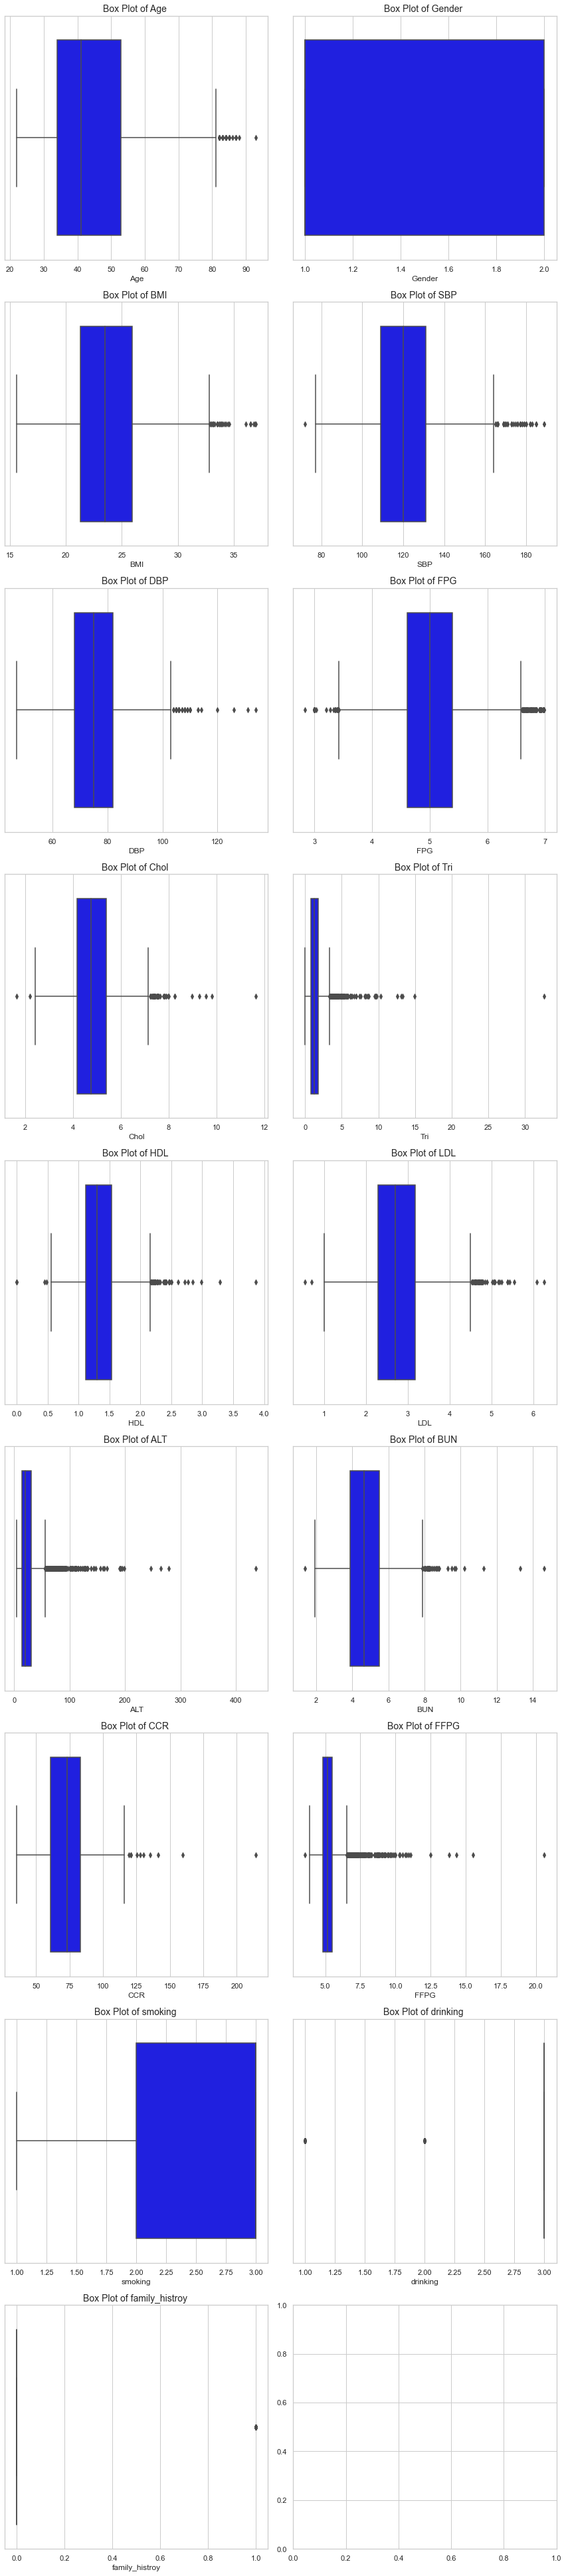

In [20]:
num_rows = (len(dm_predictors.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Looping through each column and create scatter plots
for i, column in enumerate(dm_predictors.columns):
    sns.boxplot(data=dm_predictors, x=column, ax=axes[i], color='blue')
    axes[i].set_title(f"Box Plot of {column} ", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
  



plt.tight_layout()
plt.show()

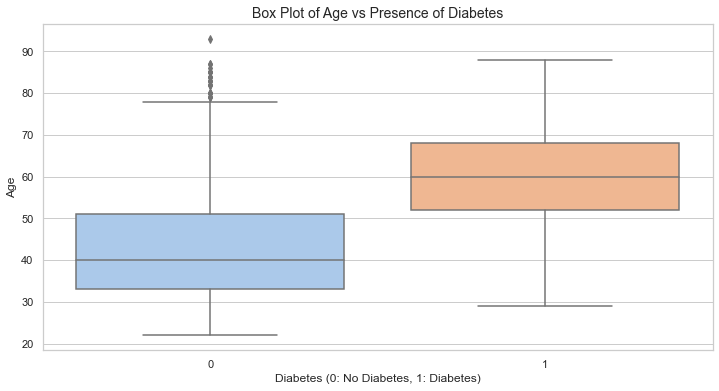

In [22]:
#Box plot of age distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_df, x='Diabetes', y='Age')
plt.xlabel('Diabetes (0: No Diabetes, 1: Diabetes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age vs Presence of Diabetes', fontsize=14)
plt.show()

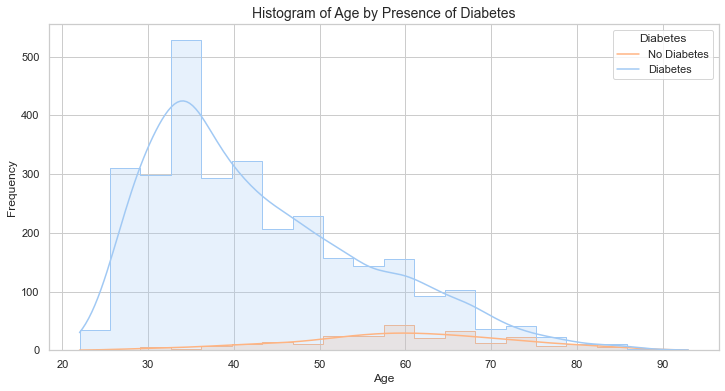

In [23]:
#Histogram of age distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.histplot(data=diabetes_df, x='Age', hue='Diabetes', kde=True, bins=20, element='step', common_norm=False)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age by Presence of Diabetes', fontsize=14)
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

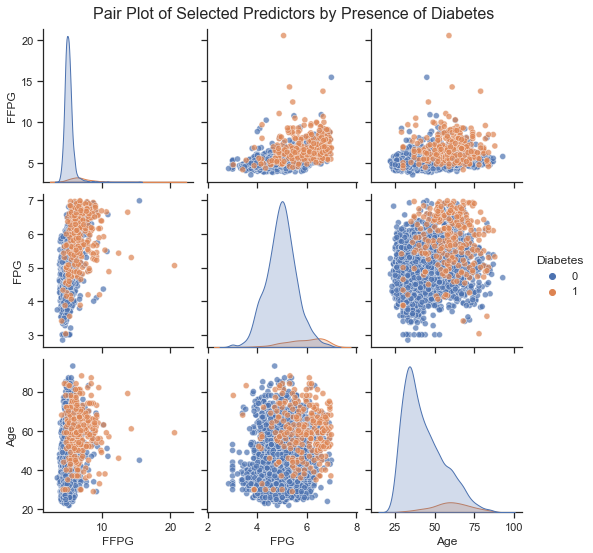

In [29]:
#Pair Plot
selected_predictors = diabetes_df[['FFPG', 'FPG', 'Age']]
sns.set(style="ticks")
sns.pairplot(diabetes_df, hue='Diabetes', vars=selected_predictors, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Selected Predictors by Presence of Diabetes', fontsize=16, y=1.02)
plt.show()

## Splitting Data into Test/Train sets

In [30]:
#Separating target variable from predictors
y_target = diabetes_df['Diabetes']
X_df = diabetes_df.drop('Diabetes', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_target, test_size=0.25, random_state=42)

In [ ]:
#Separating target variable from predictors
target = df['Outcome']
df = df.drop('Outcome', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)


Train the Models

# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)


# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)

# Fit GradientBoostingClassifier
gbt_clf.fit(X_train, y_train)

Model Predictions

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

#Defining function to calculate accuracy and F1 score for each model

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')


#Confusion Matrix for each 

adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix


gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix


#Classification Report for Each

adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)


Computing Cross-Validation Scores for Each Model

print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, df, target, cv=5).mean())

print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, df, target, cv=5).mean())


In [ ]:
Building an XGBoost Model

# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


Tuning XGBoost

#Constructing our params dictionary 
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}


#Building GridSearchCV model and getting best parameters

grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))


#Getting predictions and accuracy of model 

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


## Modeling 

## Evaluation

## Conclusion/Recommendations

## Limitations